In [12]:
import trectools
from trectools import TrecQrel, procedures

In [2]:
#Example 1

In [14]:
qrels_file = "robust03/qrel/robust03_qrels.txt"
qrels = TrecQrel(qrels_file) #Selects the premade qrels document and converts it into a useable form

In [15]:
qrels.qrels_data.head() #The format for qrels

,query,q0,docid,rel
0,303,0,FBIS3-16217,0
1,303,0,FBIS3-19093,0
2,303,0,FBIS3-21007,0
3,303,0,FBIS3-21026,0
4,303,0,FBIS3-23561,0


In [16]:
path_to_runs = "robust03/runs/" #The path to the file containing the runs

In [17]:
runs = procedures.list_of_runs_from_path(path_to_runs, "*.gz") #Selects all .gz files as runs files

Found 17 runs in path robust03/runs/


In [18]:
runs[0] #one of the files fomr path_to_runs

Data from file C:\Users\JamesYoung\Jupyter Files\Group Project\robust03\runs\input.aplrob03a.gz

In [19]:
results = procedures.evaluate_runs(runs, qrels, per_query=True) #Evaluates the runs against qrels.

In [20]:
p10 = procedures.extract_metric_from_results(results, "P_10") #Allows you to extract certain metrics from the results

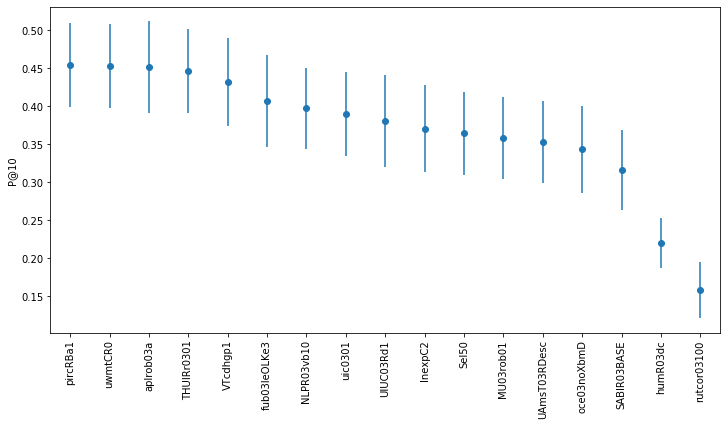

In [21]:
fig = procedures.plot_system_rank(p10, display_metric="P@10", outfile="plot.pdf")
#A plot of the P10 metric results

In [11]:
#Example 2

In [30]:
from trectools import TrecPool, TrecRun, TrecPoolMaker

In [32]:
r1 = TrecRun("./robust03/runs/input.aplrob03a.gz")
r2 = TrecRun("./robust03/runs/input.UIUC03Rd1.gz") #Select 2 runs 

In [37]:
print(r1.topics()) #Topics = queries
len(r1.topics())

[303, 307, 310, 314, 320, 322, 325, 330, 336, 341, 344, 345, 346, 347, 350, 353, 354, 355, 356, 362, 363, 367, 372, 374, 375, 378, 379, 383, 389, 393, 394, 397, 399, 401, 404, 408, 409, 414, 416, 419, 426, 427, 433, 435, 436, 439, 442, 443, 445, 448, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650]


100

In [38]:
# Strategy1: Creates a pool with top 10 documents of each run:
pool1 = TrecPoolMaker().make_pool([r1, r2], strategy="topX", topX=10) # Pool with 1636 unique documents.

In [39]:
# Strategy2: Creates a pool with 2000 documents (20 per topic) using the reciprocal ranking strategy by Gordon, Clake and Buettcher:
pool2 = TrecPoolMaker().make_pool([r1,r2], strategy="rrf", topX=20, rrf_den=60) # Pool with 2000 unique documents.

In [40]:
# Internally a pool is a dictionary (topicid, set(docnames))
pool1.pool

{601: {'FBIS3-12202',
  'FBIS3-22369',
  'FBIS3-38723',
  'FBIS3-42193',
  'FBIS4-1981',
  'FBIS4-44484',
  'FBIS4-64831',
  'FR940404-2-00028',
  'FT922-13069',
  'FT923-11593',
  'FT923-9764',
  'FT931-10200',
  'FT931-13722',
  'FT931-14451',
  'FT942-15268',
  'FT944-10568'},
 602: {'FT921-1623',
  'FT922-1409',
  'FT922-1498',
  'FT922-1536',
  'FT922-1680',
  'FT922-2143',
  'FT922-2288',
  'FT922-2508',
  'FT923-2408',
  'FT923-5753',
  'FT923-8609',
  'FT924-171',
  'FT934-11227',
  'FT934-11235'},
 603: {'FT922-991',
  'FT924-9307',
  'FT941-1212',
  'FT941-1443',
  'FT942-1181',
  'FT942-14179',
  'FT942-15472',
  'FT942-6205',
  'FT943-8137',
  'FT944-3264',
  'FT944-3389',
  'LA052689-0103',
  'LA072790-0059',
  'LA081990-0051',
  'LA122590-0054'},
 604: {'FBIS4-45839',
  'FBIS4-67664',
  'FR940802-1-00015',
  'FT943-12041',
  'LA061389-0087',
  'LA071989-0117',
  'LA073090-0058',
  'LA081989-0064',
  'LA092090-0248',
  'LA092690-0153',
  'LA111590-0227',
  'LA112690-0027',

In [41]:
# Check to see which pool covers better for run r1
pool1.check_coverage(r1, topX=10)

10.0

In [42]:
pool2.check_coverage(r1, topX=10) 

8.35

In [43]:
# Export documents to be judged using Relevation! visual assessing system
pool1.export_document_list(filename="mypool.txt", with_format="relevation")

Created mypool.txt


In [44]:
#Example 3

In [ ]:
#.... For more examples https://github.com/joaopalotti/trectools/tree/master/examples